In [39]:
!pip install openai==0.28.1 pandas numpy scikit-learn torch transformers pytorch-lightning tensorboard python-dotenv
!pip install lightning


In [40]:
import os
from google.colab import drive
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from utils import setup_environment, load_data, save_data, initialize_model, get_sentiment, plot_sentiment_distribution, plot_category_sentiment_distribution


In [41]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/individual_project/model/prediction')


In [42]:
from utils import setup_environment, load_data, save_data, get_sentiment, plot_sentiment_distribution, plot_category_sentiment_distribution


In [43]:
# Setup environment
setup_environment('/content/gdrive/MyDrive/individual_project/.env')

In [44]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0))


In [45]:
# Define paths for data
absolute_path = "/content/drive/My Drive/Dataset/" 
input_file = os.path.join(absolute_path, 'balanced_events.csv')

# Load the original dataset
df = pd.read_csv(input_file)

# Initialize the CryptoBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('ElKulako/cryptobert')
model = AutoModelForSequenceClassification.from_pretrained('ElKulako/cryptobert')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [46]:
# Apply sentiment prediction to each row
df['sentiment'] = df['combined_text'].apply(lambda x: get_sentiment(x, tokenizer, model))


# Map sentiment labels to readable format
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)



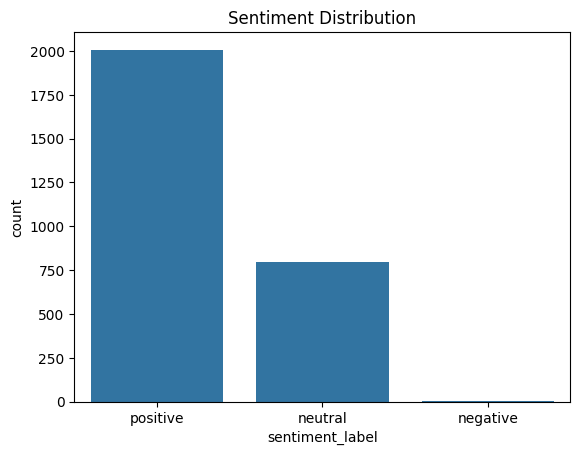

In [48]:
# Plot sentiment distribution
plot_sentiment_distribution(df)

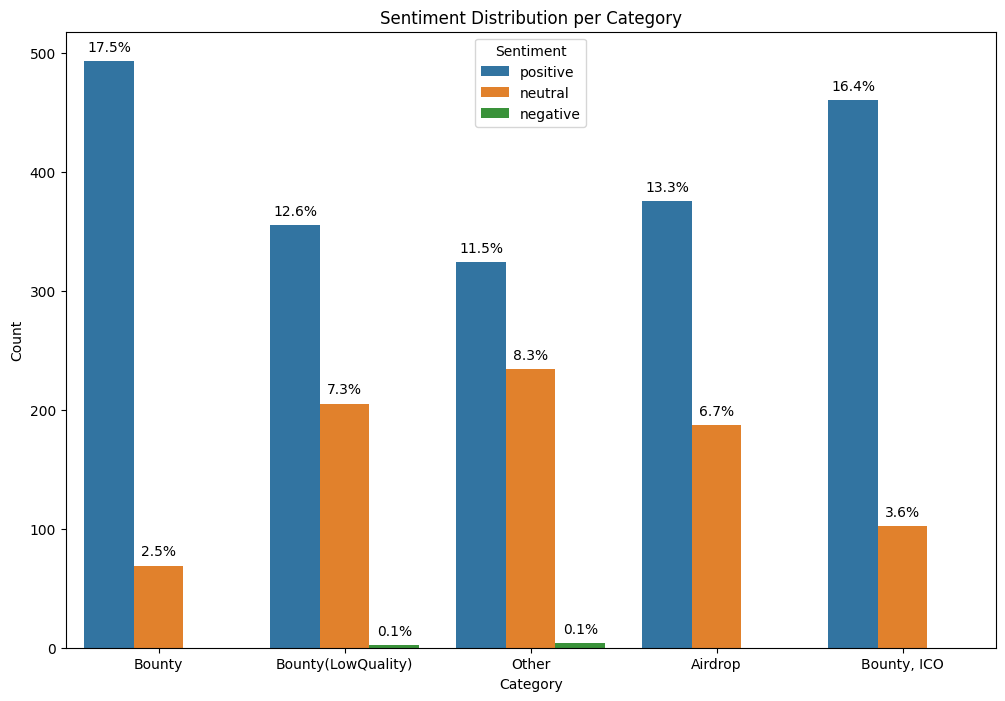

In [49]:
# Define category mapping and plot sentiment distribution per category
category_mapping = {0: 'Bounty', 1: 'Bounty(LowQuality)', 2: 'Other', 3: 'Airdrop', 4: 'Bounty, ICO'}
df['category_label'] = df['categories'].replace(category_mapping)

desired_order = ['Bounty', 'Bounty(LowQuality)', 'Other', 'Airdrop', 'Bounty, ICO']
df['category_label'] = pd.Categorical(df['category_label'], categories=desired_order, ordered=True)

plot_category_sentiment_distribution(df, category_column='category_label', sentiment_column='sentiment_label', desired_order=desired_order)